In [1]:
# install XgBoost
!pip install xgboost


In [2]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('..\Downloads\EasyVisa.csv')

In [4]:
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 25480 rows and 12 colums in the dataset.
The dataframe has no null value.
Row 5 , 6 and 8 has numeric values.

In [6]:
# checking for duplicate values
data.duplicated().sum()

0

*there are no duplicate values

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV18919,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The min value for no_of_employees cant be -26

most employees have a bachelor's degree

Most of the employment is from Northeast region.

Most popular continent which applicants are from is Asia.

Average prevailing wage is $74456.There's also a very huge difference in 75th percentile and maximum value

There's an extremely large gap between the 75th percentile and the max value of no_of_employees

Most of the employees have job experience.

In [8]:
#to view the negative values
data.loc[data['no_of_employees'] < 0].head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


In [9]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [10]:
#to change the negative to positive assuming there are entry errors 
data["no_of_employees"] = abs(data["no_of_employees"]) 

changed

In [11]:
#check the count of each unique category in each of the categorical variables.
#Making a list of all catrgorical variables

c_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in c_col:
    print(data[column].value_counts())
    print("-" * 30) 

EZYV12390    1
EZYV20205    1
EZYV3933     1
EZYV36       1
EZYV5936     1
            ..
EZYV14607    1
EZYV21497    1
EZYV10799    1
EZYV20959    1
EZYV17758    1
Name: case_id, Length: 25480, dtype: int64
------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month      

since all the values in case_id are unique, the column will be droped

In [12]:
## Complete the code to drop 'case_id' column from the data
data.drop(['case_id'], axis=1, inplace=True)

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="orange", linestyle="-"
    )  # Add median to the histogram

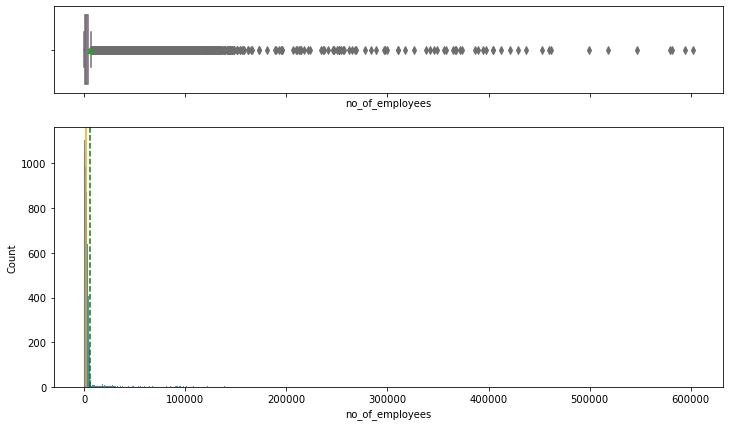

In [14]:
histogram_boxplot(data, "no_of_employees")

there are a lot of outliers 

i'm not even seeing any box, its like there is no graph here or i didnt do it correctly, *shrugs*

what does count stand for again?

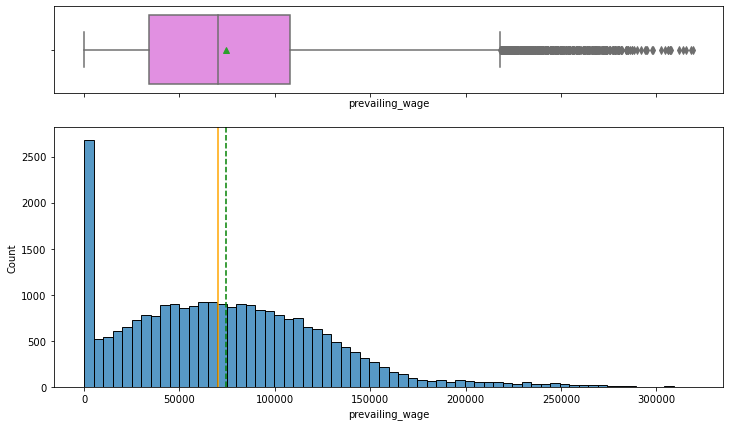

In [15]:
histogram_boxplot(data,"prevailing_wage") 

there are outliers but not as much as the one in no_of_employees column

median is the 50th percentile

so apparently count means the frequency of occurrences of each unique value in the "prevailing_wage" column.
its still not adding up though

ok so, count is frequency yeah, but the frequency of a percentile group, not just individual values. so yeah


In [16]:
data.loc[data['prevailing_wage'] < 5000].shape

(2682, 11)

In [17]:
data.loc[data['prevailing_wage'] < 100].head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
1144,Asia,Master's,N,N,3542,2001,Northeast,48.0065,Hour,Y,Denied
1147,North America,Bachelor's,Y,N,169,2007,Northeast,99.3492,Hour,Y,Denied
1215,Asia,Bachelor's,N,N,1814,2002,Northeast,10.5551,Hour,Y,Denied
1238,South America,Doctorate,N,N,1998,1992,West,16.4637,Hour,Y,Denied
1326,Asia,Master's,N,N,2198,2004,Northeast,89.5992,Hour,Y,Denied


In [18]:

data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() 

Hour    176
Name: unit_of_wage, dtype: int64

all the data from the prevailing wages that are less tham 100 are on hourly pay which makes sense and shows that the data is consistent

In [19]:

data.loc[data["prevailing_wage"] < 5000, "unit_of_wage"].value_counts() 

Hour     2157
Year      518
Week        4
Month       3
Name: unit_of_wage, dtype: int64

all the hourly wage are in the first bin i.e prevailing wage < 5000

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def labeled_barplot(data, feature):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    """

    total = len(data[feature])  # length of the column
    plt.figure(figsize=(8, 6))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired")

    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.xlabel(feature, fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.title(f"Bar Plot of {feature} with Percentage", fontsize=18)
    plt.show()




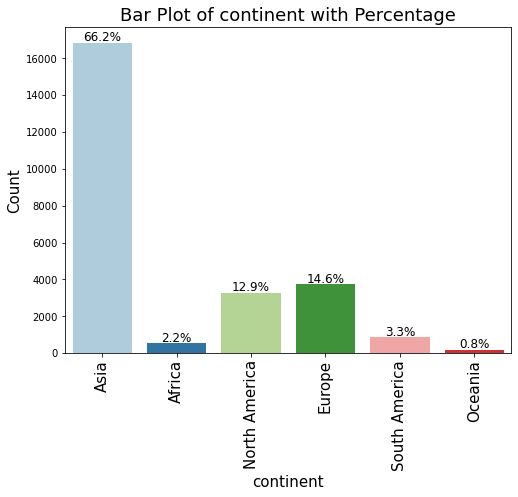

In [21]:
labeled_barplot(data, "continent") 

most of the applicants are from asia (more than half)

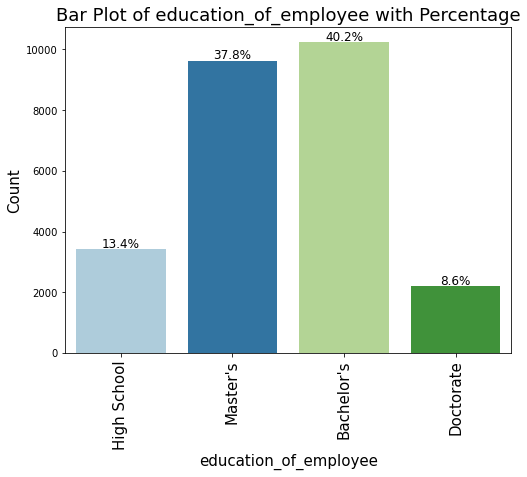

In [22]:
labeled_barplot(data, "education_of_employee") 

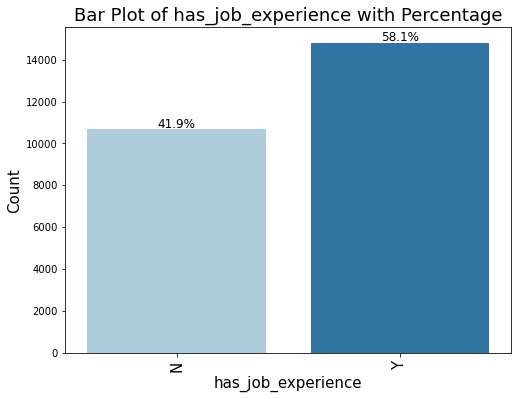

In [23]:
labeled_barplot(data, "has_job_experience") 

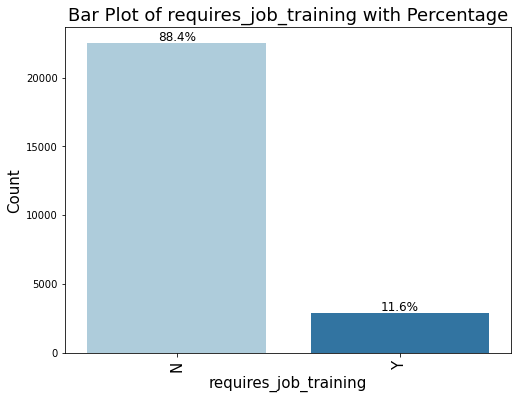

In [24]:
labeled_barplot(data, "requires_job_training") 

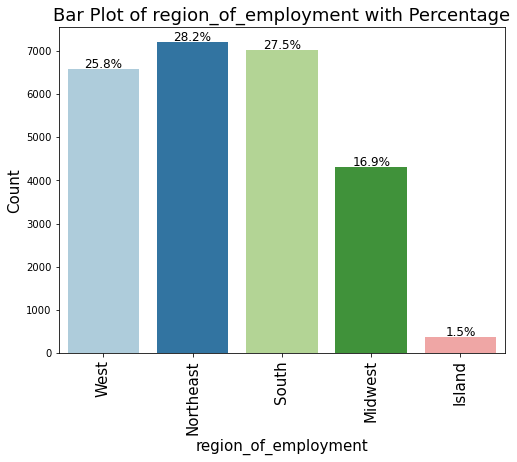

In [25]:
labeled_barplot(data, "region_of_employment") 

Northeast, South, and West have almost equal percentages of applicants. (25%-28%)
The Island regions have only 1.5% of the applicants.

the island can be an outlier 

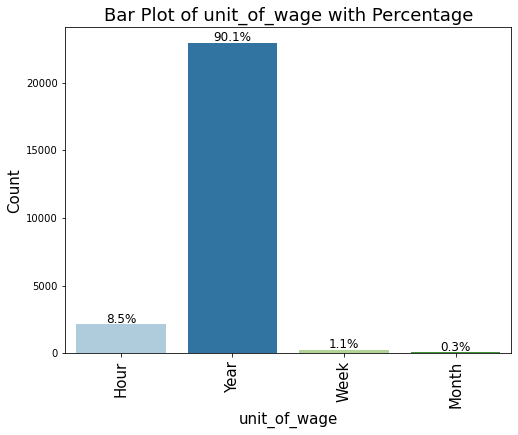

In [26]:
labeled_barplot(data, "unit_of_wage") 

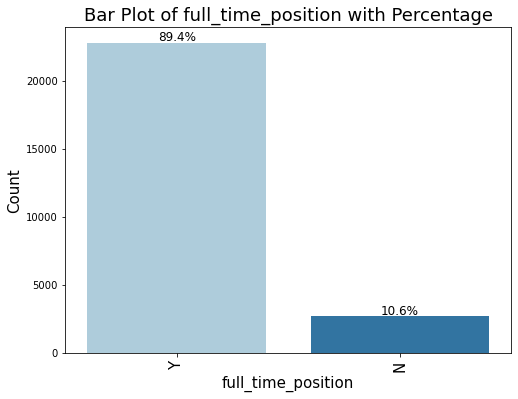

In [27]:
labeled_barplot(data, "full_time_position") 

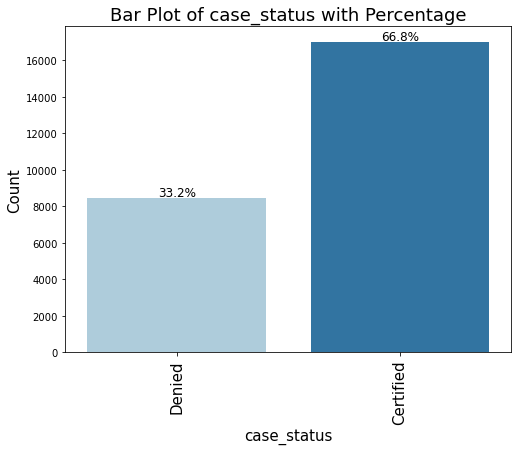

In [28]:
labeled_barplot(data, "case_status") 

most of the applicants were granted visa. why?

In [29]:
# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Find the correlation between the numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees         1.000000    -0.017770        -0.009523
yr_of_estab            -0.017770     1.000000         0.012342
prevailing_wage        -0.009523     0.012342         1.000000


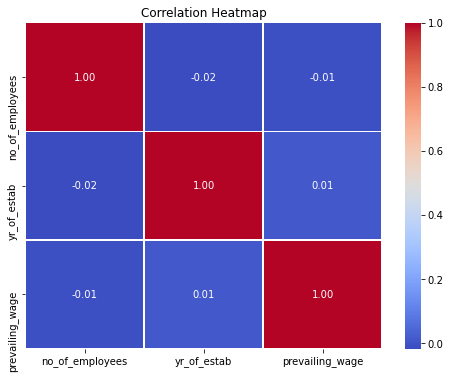

In [30]:

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set heatmap title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()


In the provided correlation matrix, the correlation coefficients are as follows:

Correlation between "no_of_employees" and "yr_of_estab" = -0.017770

Correlation between "no_of_employees" and "prevailing_wage" = -0.009523

Correlation between "yr_of_estab" and "prevailing_wage" = 0.012342

The correlation coefficient between these variables is very close to zero

This indicates a weak correlation or almost no linear relationship 

case_status            Certified  Denied
education_of_employee                   
Bachelor's                  6367    3867
Doctorate                   1912     280
High School                 1164    2256
Master's                    7575    2059


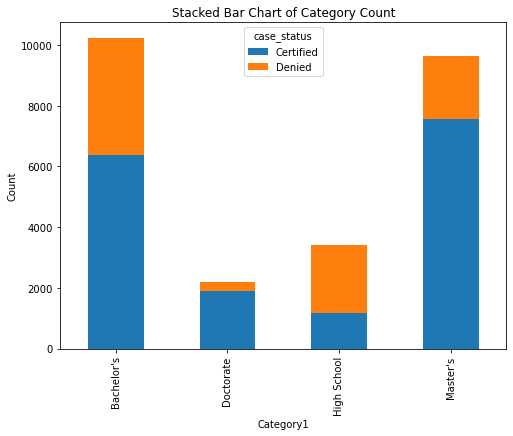

In [31]:
category_count = pd.crosstab(data['education_of_employee'], data['case_status'])

# Print the category count
print(category_count)

# Plot a stacked bar chart
category_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.xlabel('Category1')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Category Count')
# Show the plot
plt.show()

to further understand this chart, we will make all stacked bars be on the same level, 
probably using percentage

In [32]:
def plot_stacked_bar_chart(data, predictor_column, target_column):
    """
    Generate a stacked bar chart based on two specified columns from a DataFrame.

    data: DataFrame
    predictor_column: Column name of the predictor variable
    target_column: Column name of the target variable
    """
    count = data[predictor_column].nunique()
    sorter = data[target_column].value_counts().index[-1]

    category_count = pd.crosstab(data[predictor_column], data[target_column], normalize='index').sort_values(
       by=sorter, ascending=False
    )
    print(category_count)
    # Plot a stacked bar chart
    category_count.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.xlabel(predictor_column)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Chart of {target_column} by {predictor_column}')

    # Show the plot
    plt.show()

case_status            Certified    Denied
education_of_employee                     
High School             0.340351  0.659649
Bachelor's              0.622142  0.377858
Master's                0.786278  0.213722
Doctorate               0.872263  0.127737


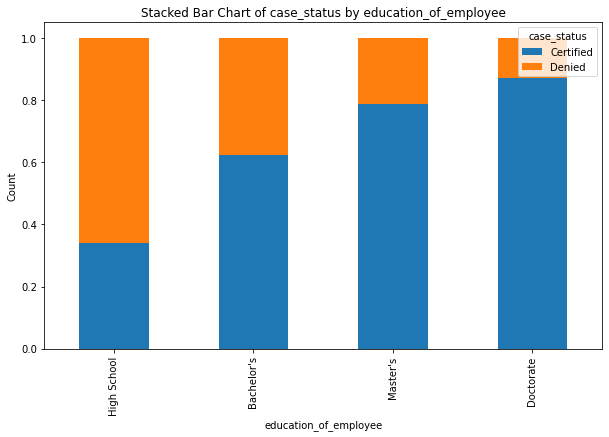

In [33]:
plot_stacked_bar_chart(data, 'education_of_employee', 'case_status')

from the chart

it seems like the higher the degree one has, the more likely your visa will be accepted

like high school education has less visa certified than those with doctorate education 

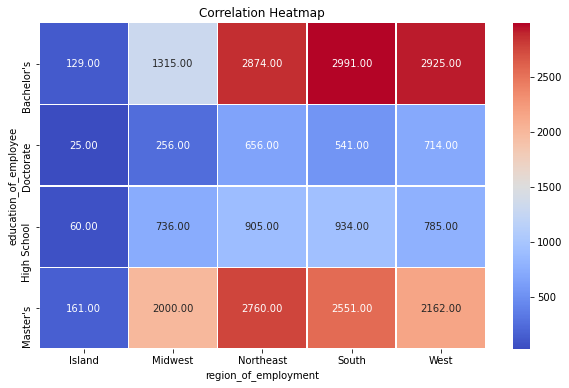

In [34]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set heatmap title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()


The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
The requirement for Bachelor's is mostly in South region, followed by West region.
The requirement for Master's is most in Northeast region, followed by South region.
The requirement for Doctorate's is mostly in West region, followed by Northeast region.

but can yu call these requirements?
not really

case_status           Certified    Denied
region_of_employment                     
Island                 0.602667  0.397333
West                   0.622533  0.377467
Northeast              0.629048  0.370952
South                  0.700157  0.299843
Midwest                0.755282  0.244718


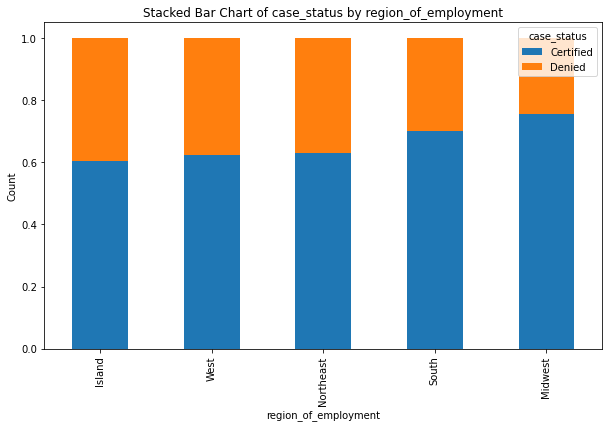

In [35]:
    plot_stacked_bar_chart(data, 'region_of_employment', 'case_status')
    

midwest sees the highest no of visa certifications but its not the most picked from any level 0f education

south sees the next highest

In [36]:
category_count20 = pd.crosstab(data['continent'], data['case_status'])

# Print the category count
print(category_count20)




case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


case_status    Certified    Denied
continent                         
South America   0.578638  0.421362
North America   0.618773  0.381227
Oceania         0.635417  0.364583
Asia            0.653105  0.346895
Africa          0.720508  0.279492
Europe          0.792337  0.207663


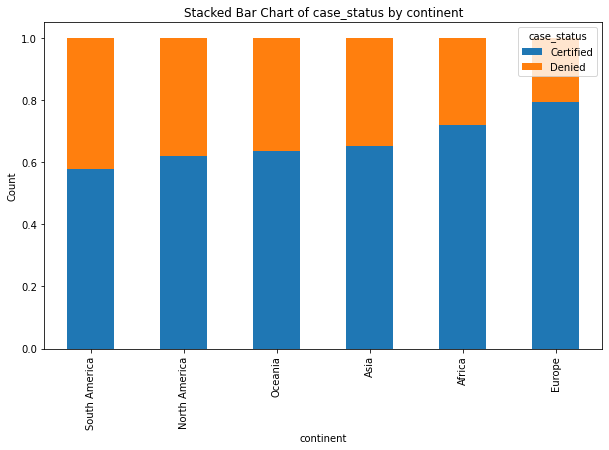

In [37]:
    plot_stacked_bar_chart(data, 'continent', 'case_status')
    

europe has the highest visa acceptance followed by africa

asia has the 3rd highest visa certification but has the highest no of application

case_status         Certified    Denied
has_job_experience                     
N                    0.561341  0.438659
Y                    0.744764  0.255236


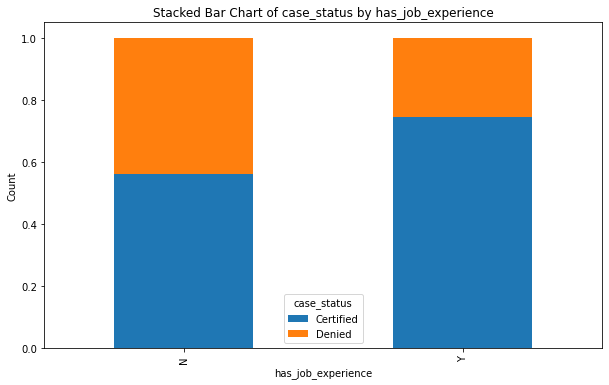

In [38]:
       plot_stacked_bar_chart(data, 'has_job_experience', 'case_status')
     

those that have job experience have a higher chance of their visa being certified with about 74%

but about 56% of people who didnt have a job experience also got their visa certified

requires_job_training         N         Y
has_job_experience                       
N                      0.841731  0.158269
Y                      0.914539  0.085461


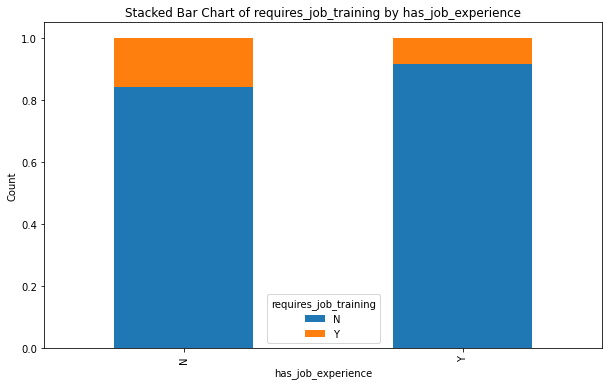

In [39]:
       plot_stacked_bar_chart(data, 'has_job_experience', 'requires_job_training')
     

minimum percentage of applicants dont require job training

but less if they have job experience

In [40]:
#functions to plot distributions wrt target

def plot_distributions_with_target(data, predictor_column, target_column):
    """
    Plot distributions of predictor and target columns with respect to the target variable.

    data: DataFrame
    predictor_column: Column name of the predictor variable
    target_column: Column name of the target variable
    """
    plt.figure(figsize=(12, 6))

    # Plot distribution of the predictor variable for each target category
    plt.subplot(1, 3, 1)
    sns.boxplot(x=target_column, y=predictor_column, data=data)
    plt.xlabel(target_column)
    plt.ylabel(predictor_column)
    plt.title(f'Distribution of {predictor_column} wrt {target_column}')

    # Plot distribution of the target variable
    plt.subplot(1, 3, 2)
    sns.histplot(data[target_column], kde=True, color='blue')
    plt.xlabel(target_column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {target_column}')
    
       # Plot histogram of the predictor variable without outliers
    plt.subplot(1, 3, 3)
    sns.histplot(data[predictor_column], kde=True, color='skyblue')
    plt.xlabel(predictor_column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {predictor_column}')

    plt.tight_layout()
    plt.show()


 How does the visa status change with the prevailing wage?

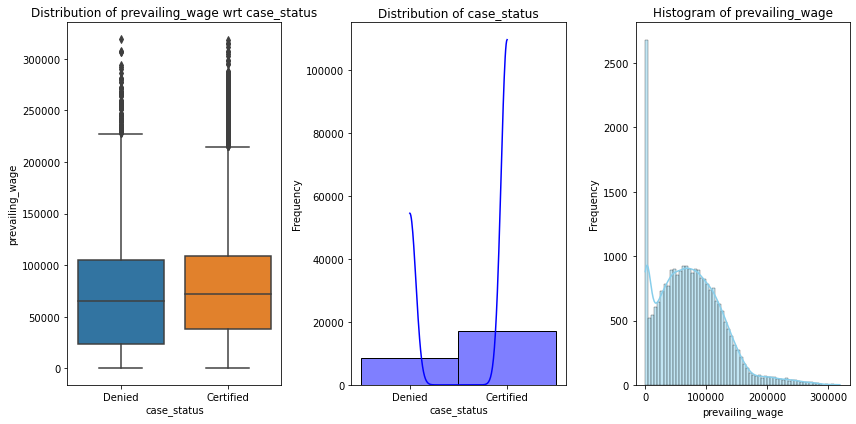

In [41]:
plot_distributions_with_target(data, 'prevailing_wage', 'case_status')

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

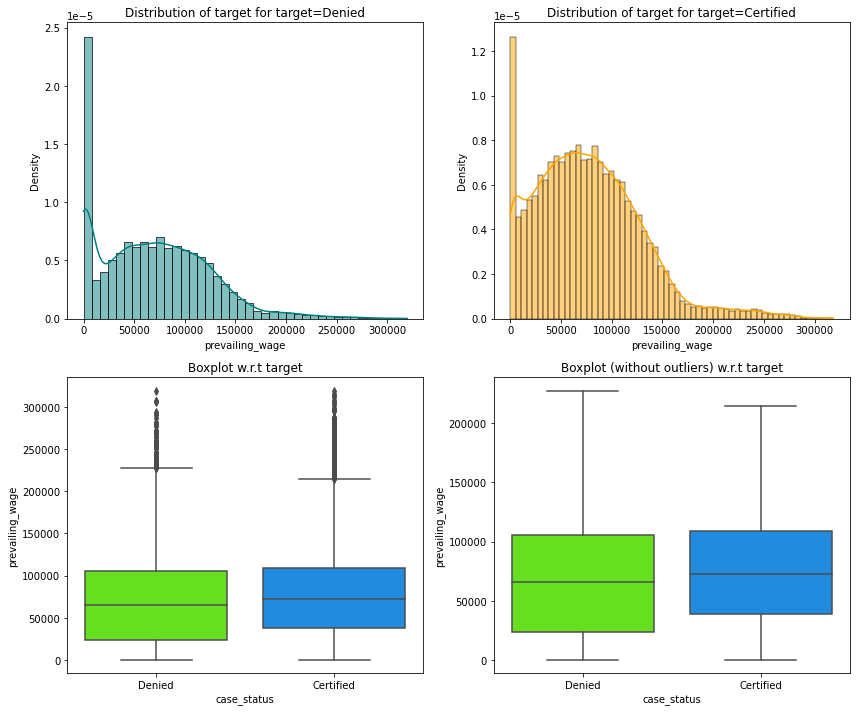

In [43]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

the median wage for the certified applications is slightly higher than the denied application

but is the prevailing wage similar across all region.

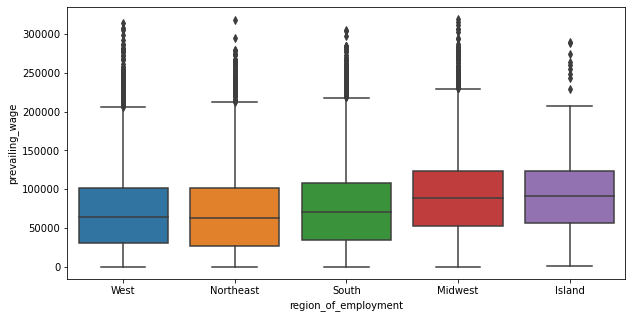

In [44]:
#prevailing wage across regions
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

midwest and inland have slightly higher median wages compared to other regions

requires_job_training         N         Y
has_job_experience                       
N                      0.841731  0.158269
Y                      0.914539  0.085461


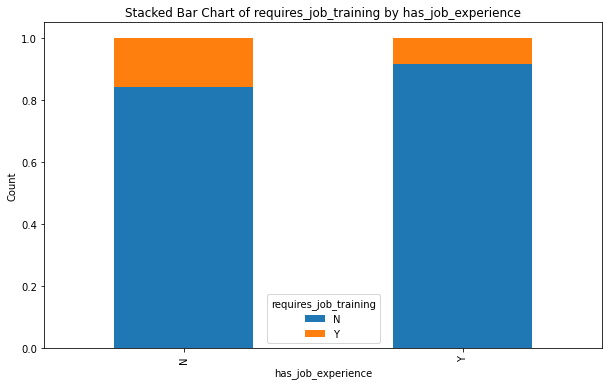

In [45]:
plot_stacked_bar_chart(data, 'has_job_experience', 'requires_job_training')

case_status   Certified    Denied
unit_of_wage                     
Hour           0.346314  0.653686
Month          0.617978  0.382022
Week           0.621324  0.378676
Year           0.698850  0.301150


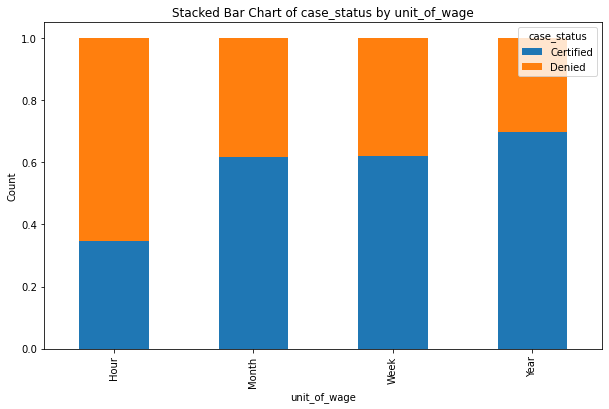

In [46]:
#which unit of wages is most likely to be certified

plot_stacked_bar_chart(data, 'unit_of_wage', 'case_status')

yearly is most likely to be certified 
but week and month's percentage of employees certified is almost the same

In [47]:
#to check outliers
def detect_outliers_boxplot(data, column):
    """
    Detect outliers in a column using boxplot.

    data: DataFrame
    column: Column name for which outliers need to be detected
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[column])
    plt.xlabel(column)
    plt.title(f'Boxplot for {column}')

 
    plt.show()

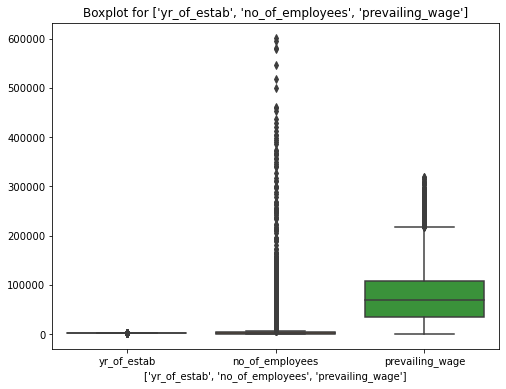

In [48]:
# List of numerical columns
numerical_columns2 = ['yr_of_estab', 'no_of_employees', 'prevailing_wage']

# Detect outliers using boxplots and the IQR method
detect_outliers_boxplot(data, numerical_columns2)

##Data Preparation for modeling

In [49]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
data.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [50]:
## Let's drop case status from the data
X = data.drop(["case_status"], axis=1) 
y = data["case_status"]

## Let's create dummies
X = pd.get_dummies(X, drop_first=True)  

## Let's split the data into train and test in the ratio 70:30
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [51]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [52]:
print("Training set shape:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nTesting set shape:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Calculate the percentage of the training and test sets relative to the total dataset
total_samples = len(X_train) + len(X_test)
train_percentage = (len(X_train) / total_samples) * 100
test_percentage = (len(X_test) / total_samples) * 100

print("\nPercentage of Training set:", train_percentage, "%")
print("Percentage of Test set:", test_percentage, "%")

# Proceed to build and evaluate your predictive model using X_train and y_train.

Training set shape:
X_train shape: (17836, 21)
y_train shape: (17836,)

Testing set shape:
X_test shape: (7644, 21)
y_test shape: (7644,)

Percentage of Training set: 70.0 %
Percentage of Test set: 30.0 %


In [53]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### RANDOM FOREST

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)
rf_estimator.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=1)

Checking model performance on training set

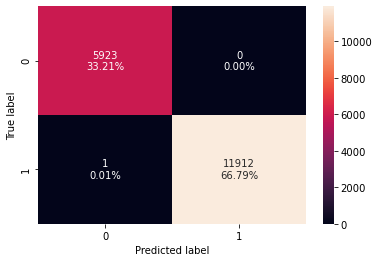

In [56]:
## matrix for train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [57]:
# train performance
y_pred1 = rf_estimator.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.999943933617403
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00     11913

    accuracy                           1.00     17836
   macro avg       1.00      1.00      1.00     17836
weighted avg       1.00      1.00      1.00     17836



In [58]:
# performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train) 
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


Checking model performance on test set

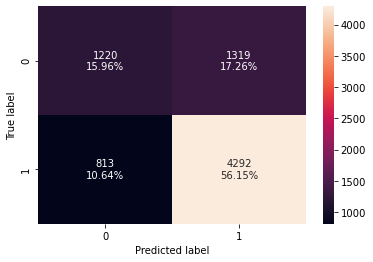

In [59]:
# confusion matrix for test data
confusion_matrix_sklearn(rf_estimator,X_test,y_test) 

In [60]:
# performance of the test set
y_pred = rf_estimator.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7210884353741497
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.48      0.53      2539
           1       0.76      0.84      0.80      5105

    accuracy                           0.72      7644
   macro avg       0.68      0.66      0.67      7644
weighted avg       0.71      0.72      0.71      7644



In [61]:
## Let's check performance for test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test) 
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.721088,0.840744,0.764926,0.801045


the model seems to be performing well on the train set with almost perfect accuracy, precision, recall, and F1-score for both classes. 

However, it is not generalizing as well on the test set, as evidenced by lower accuracy and F1-score. 

There might be some overfitting on the training data, and further tuning or regularization techniques may be necessary to improve the model's performance on unseen data.

#### Hyperparameter Tuning - Random Forest

In [62]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

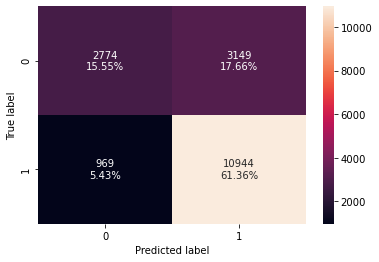

In [63]:
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [64]:
# train performance
y_pred1 = rf_tuned.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.7691186364655752
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.47      0.57      5923
           1       0.78      0.92      0.84     11913

    accuracy                           0.77     17836
   macro avg       0.76      0.69      0.71     17836
weighted avg       0.76      0.77      0.75     17836



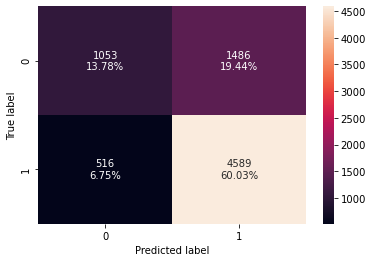

In [65]:
# confusion matrix for test data
confusion_matrix_sklearn(rf_tuned,X_test,y_test) 

In [66]:
# performance of the test set
y_pred = rf_tuned.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7380952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.41      0.51      2539
           1       0.76      0.90      0.82      5105

    accuracy                           0.74      7644
   macro avg       0.71      0.66      0.67      7644
weighted avg       0.73      0.74      0.72      7644



In [102]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train) 
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


In [103]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) 
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


After hyperparameter tuning the model performance has generalized.

We have an F1 score of 0.84 and 0.82 on the training and test data, respectively.

The model has a high recall and a good precision.

### decision tree

In [67]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

performance on test set

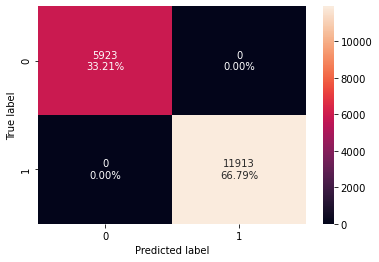

In [68]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [69]:
# train performance
y_pred1 = dtree.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00     11913

    accuracy                           1.00     17836
   macro avg       1.00      1.00      1.00     17836
weighted avg       1.00      1.00      1.00     17836



performance on test set

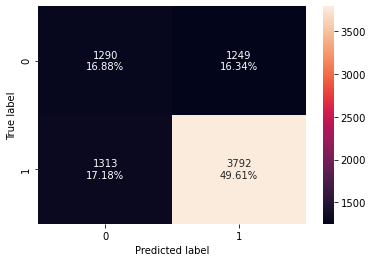

In [70]:
## Let's create confusion matrix for test data
confusion_matrix_sklearn(dtree, X_test, y_test)

In [71]:
# performance of the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6648351648351648
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50      2539
           1       0.75      0.74      0.75      5105

    accuracy                           0.66      7644
   macro avg       0.62      0.63      0.62      7644
weighted avg       0.67      0.66      0.67      7644



In [98]:
## Let's check the performance on train data
decision_tree_perf_train = model_performance_classification_sklearn(dtree, X_train, y_train) 
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [99]:
## Let's check performance for test data
decision_tree_perf_test = model_performance_classification_sklearn(dtree, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


the performance on the training set is significantly better than on the test set, 

which indicates a potential overfitting issue. 

#### Hyperparameter Tuning - decision tree Classifier

In [72]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

## Run grid search with n_jobs = -1
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)  

## Code to fit the grid_obj on the train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

performance on train set

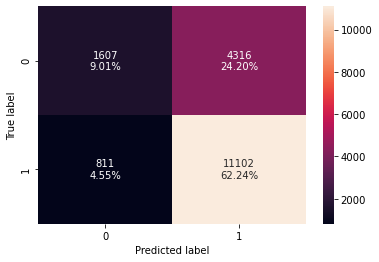

In [73]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [74]:
# train performance
y_pred1 = dtree_estimator.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.7125476564252075
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.27      0.39      5923
           1       0.72      0.93      0.81     11913

    accuracy                           0.71     17836
   macro avg       0.69      0.60      0.60     17836
weighted avg       0.70      0.71      0.67     17836



performance on test set

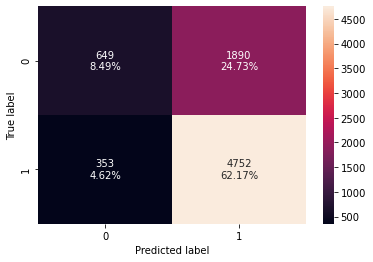

In [75]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test) 

In [76]:
# performance of the test set
y_pred = dtree_estimator.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.706567242281528
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.26      0.37      2539
           1       0.72      0.93      0.81      5105

    accuracy                           0.71      7644
   macro avg       0.68      0.59      0.59      7644
weighted avg       0.69      0.71      0.66      7644



In [100]:
## Let's check performance
dtree_tuned_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train,y_train) 
dtree_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


In [101]:
## Let's check performance for test data on tuned estimator
dtree_tuned_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) 
dtree_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


 the decision tree classifier achieved a relatively higher accuracy and F1-score for class 1, 
 
 indicating that it is better at correctly classifying instances of class 1. 
 
 However, its performance on class 0 is lower, as evident from the lower recall and F1-score for class 0. 

### AdaBoost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1) 
ab_classifier.fit(X_train,y_train)


AdaBoostClassifier(random_state=1)

model performance on train set

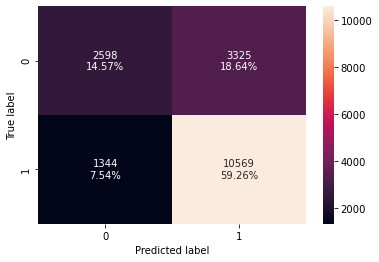

In [78]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [79]:
# train performance
y_pred1 = ab_classifier.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.7382260596546311
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.44      0.53      5923
           1       0.76      0.89      0.82     11913

    accuracy                           0.74     17836
   macro avg       0.71      0.66      0.67     17836
weighted avg       0.73      0.74      0.72     17836



model performance on train set

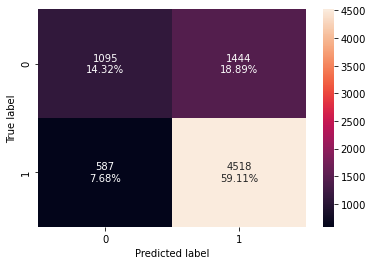

In [80]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [81]:
# performance of the test set
y_pred = ab_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7343014128728415
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.43      0.52      2539
           1       0.76      0.89      0.82      5105

    accuracy                           0.73      7644
   macro avg       0.70      0.66      0.67      7644
weighted avg       0.72      0.73      0.72      7644



In [104]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


In [105]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) 
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


the Adaboost classifier achieved an accuracy of around 73.82% on the train set and 73.43% on the test set. 

The classifier performs better for class 1 in terms of precision, recall, and F1-score, as it has higher values compared to class 0. 

Class 1 is the majority class, as it has more support than class 0 in both the train and test sets. 

Overall, the classifier is performing reasonably well, but there may be some room for improvement, especially for class 0 predictions. 

Further analysis and tuning may be required to enhance the classifier's performance on both classes.

#### Hyperparameter Tuning - AdaBoost Classifier

In [82]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

performance on train set

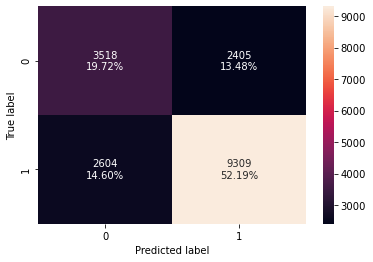

In [83]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [84]:
# train performance
y_pred1 = abc_tuned.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.7191634895716529
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58      5923
           1       0.79      0.78      0.79     11913

    accuracy                           0.72     17836
   macro avg       0.68      0.69      0.69     17836
weighted avg       0.72      0.72      0.72     17836



performance on test set

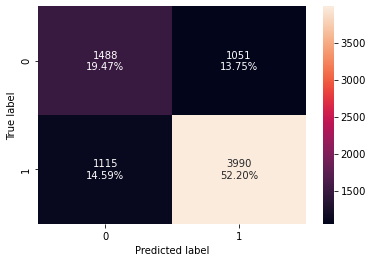

In [85]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [86]:
# performance of the test set
y_pred = abc_tuned.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.716640502354788
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58      2539
           1       0.79      0.78      0.79      5105

    accuracy                           0.72      7644
   macro avg       0.68      0.68      0.68      7644
weighted avg       0.72      0.72      0.72      7644



In [106]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) 
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719163,0.781415,0.79469,0.787997


In [107]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) 
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.716641,0.781587,0.79151,0.786517


The tuned AdaBoostClassifier is achieving similar performance on both the train and test sets

but it dosent seem to help much as its almost the same as before the hyperparameter tuning


In [87]:
#!/usr/bin/env python
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

{'total': 16951066624,
 'available': 10060615680,
 'percent': 40.6,
 'used': 6890450944,
 'free': 10060615680}

### Gradient Boosting Classifier

In [88]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=1)

model performance on train set

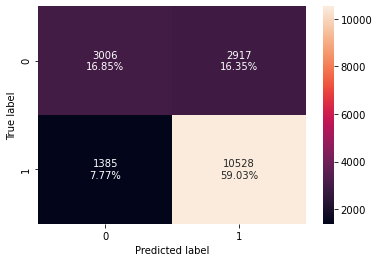

In [89]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [90]:
# train performance
y_pred1 = gb_classifier.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.7588024220677282
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.51      0.58      5923
           1       0.78      0.88      0.83     11913

    accuracy                           0.76     17836
   macro avg       0.73      0.70      0.71     17836
weighted avg       0.75      0.76      0.75     17836



model performance on test set

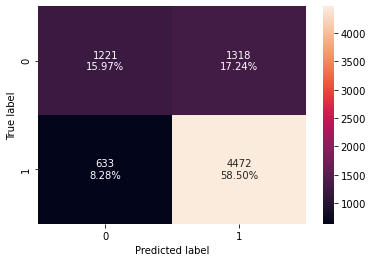

In [91]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [92]:
# performance of the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7447671376242805
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.56      2539
           1       0.77      0.88      0.82      5105

    accuracy                           0.74      7644
   macro avg       0.72      0.68      0.69      7644
weighted avg       0.73      0.74      0.73      7644



In [108]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) 
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


In [109]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) 
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


 the classifier achieves relatively good accuracy and F1-score on both the training and test sets
 
this indicates that it is performing reasonably well in predicting visa certification and denial.

#### Hyperparameter Tuning - Gradient Boosting Classifier

In [93]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": [0.1, 0.21, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
## Complete the code to run grid search with cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5) 

## Let's fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

model performance on train set

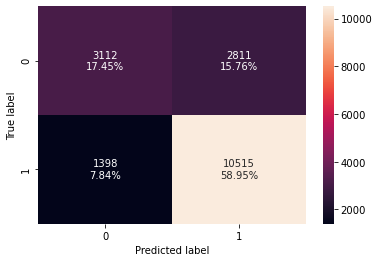

In [94]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [95]:
# train performance
y_pred1 = gbc_tuned.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred1))
print("Classification Report:\n", classification_report(y_train, y_pred1))

Accuracy: 0.7640165956492487
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60      5923
           1       0.79      0.88      0.83     11913

    accuracy                           0.76     17836
   macro avg       0.74      0.70      0.71     17836
weighted avg       0.76      0.76      0.75     17836



model performance on test set

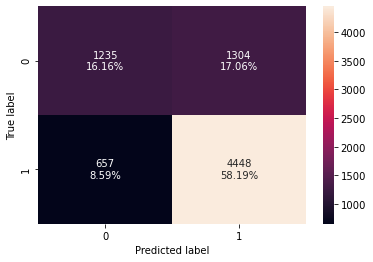

In [96]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [97]:
# performance of the test set
y_pred = gbc_tuned.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7434589220303506
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56      2539
           1       0.77      0.87      0.82      5105

    accuracy                           0.74      7644
   macro avg       0.71      0.68      0.69      7644
weighted avg       0.73      0.74      0.73      7644



In [110]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) 
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


In [111]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) 
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


After tuning there is not much change in the model performance as compared to the model with default values of hyperparameters.

it seems to be a good model

### model performance comparison and conclusion

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]


In [113]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]


In [116]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.712548,0.999944,0.769119,0.738226,0.719163,0.758802,0.764017
Recall,1.0,0.931923,0.999916,0.918660,0.887182,0.781415,0.883740,0.882649
Precision,1.0,0.720067,1.000000,0.776556,0.760688,0.794690,0.783042,0.789059
F1,1.0,0.812411,0.999958,0.841652,0.819080,0.787997,0.830349,0.833234


In [114]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.664835,0.706567,0.721088,0.738095,0.734301,0.716641,0.744767,0.743459
Recall,0.742801,0.930852,0.840744,0.898923,0.885015,0.781587,0.876004,0.871303
Precision,0.752232,0.715447,0.764926,0.755391,0.757799,0.791510,0.772366,0.773296
F1,0.747487,0.809058,0.801045,0.820930,0.816481,0.786517,0.820927,0.819379


gradient boost classifier and tuned random forest classifier seem to be good models 

although since Since visa certification involves making important decisions about granting visas to employees, we need to be cautious about both false positives (approving visas for employees who shouldn't be eligible) and false negatives (rejecting visas for eligible employees).

so based on the provided test performance comparison, the model with the highest overall F1-score is the "Tuned Random Forest" classifier, with an F1-score of approximately 0.8209. 

#### Features of the final model

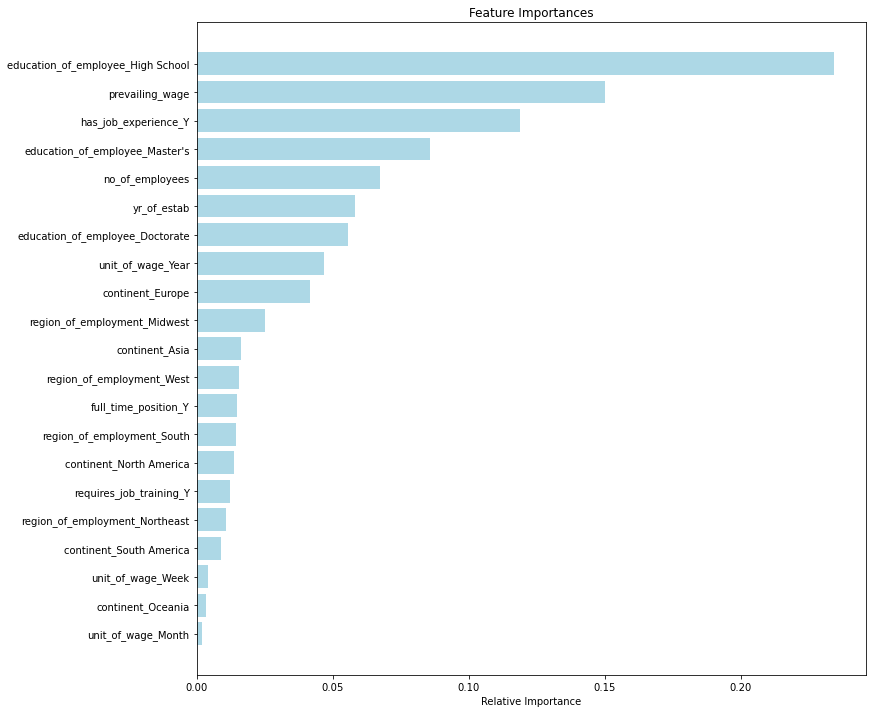

In [120]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

from the important features in the model

the top three important features to look for while certifying a visa are -Education of the employee, Job experience, and Prevailing Wage.

#### INSIGHTS

**The profile of the applicants for whose visa can be certified:**

**Primary information:**
- `Education level` - At least has a Bachelor's degree - Master's and doctorate are preferred.
- `Job Experience` - has job experience. 
- `Prevailing wage` - has a high prevailing wage most likely yearly (The median prevailing wage of the employees for whom the visa got certified is around 72k. )
- `Continent`-  it has been observed that applicants from Europe, Africa, and Asia have higher chances of visa certification.



**The profile of the applicants for whom the visa status can be denied:**

**Primary information to look at:**
- `Education level` - high school degree.
- `Job Experience` - Doesn't have any job experience. 
- `Prevailing wage and unit of wage` - applicants with hourly units of wage (The median prevailing wage of the employees for whom the visa got certified is around 65k.)
- `Continent` - it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.